In [195]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

## Skeleton joints
## https://www.webpages.uidaho.edu/ui-prmd/

#% 1 Waist (absolute position)
#% 2 Spine (relative to waist)
#% 3 Chest (...)
#% 4 Neck
#% 5 Head
#% 6 Head tip
#% 7 Left collar
#% 8 Left upper arm 
#% 9 Left forearm
#% 10 Left hand
#% 11 Right collar
#% 12 Right upper arm 
#% 13 Right forearm
#% 14 Right hand
#% 15 Left upper leg 
#% 16 Left lower leg 
#% 17 Left foot 
#% 18 Left leg toes
#% 19 Right upper leg 
#% 20 Right lower leg 
#% 21 Right foot
#% 22 Right leg toes

correct_exercises_folder = '../data/raw/UI-PRMD/Movements/Kinect/Positions/'
incorrect_exercises_folder = '../data/raw/UI-PRMD/Incorrect Movements/Kinect/Positions/'

In [142]:
# Load single file positions
def parse_file(path):
    df = pd.read_csv(path, delim_whitespace=True, header=None)
    frames = df.shape[0]
    data = np.reshape(df.to_numpy(), (frames, 22, 3)) # Reshape into (L, J, F)
    return data

In [97]:
# Plot sample
def plot_joint_movement(data, joint=0):
    plt.plot(data[:, joint, 0], label=f'joint{joint}-x')
    plt.plot(data[:, joint, 1], label=f'joint{joint}-y')
    plt.plot(data[:, joint, 2], label=f'joint{joint}-z')

    plt.legend()
    plt.show()

In [125]:
def load_dataset(path):
    result = {}
    for f in os.scandir(path):
        if f.name.endswith('.txt'):
            tokens = f.name.split('_')
            movement = int(tokens[0][1:])
            subject = int(tokens[1][1:])#
    
            if movement not in result:
                result[movement] = {}

            data = parse_file(f.path)
            result[movement][subject] = data
            
    return result

In [212]:
def stack_movements_subjects_data(data, max_frames=1400):
    movements = []
    for movement in data:
        subjects = list(data[movement].values())
        for i in range(len(subjects)): # Pad frames for short samples
            frames = subjects[i].shape[0]
            subjects[i] = np.pad(
                subjects[i], 
                pad_width=((0, max_frames-frames), (0, 0), (0, 0)), 
                mode='mean'
            )
        
        movements.append(np.stack(subjects))
    return np.stack(movements)

In [197]:
def save_data_object(data, filename):
    filepath = os.path.join('../data/processed/', filename)
    with open(filepath, 'wb') as f:
        pickle.dump(data, f)

In [217]:
correct_data = load_dataset(correct_exercises_folder)
correct_padded_data = stack_movements_subjects_data(correct_data)
incorrect_data = load_dataset(incorrect_exercises_folder)
incorrect_padded_data = stack_movements_subjects_data(incorrect_data)

In [218]:
# Complete dataset with all target, classes, exercises and subjects
complete_padded_data = np.stack([correct_padded_data, incorrect_padded_data])
save_data_object(complete_padded_data, 'uiprmd.pkl')
print(complete_padded_data.shape)

(2, 10, 10, 1400, 22, 3)


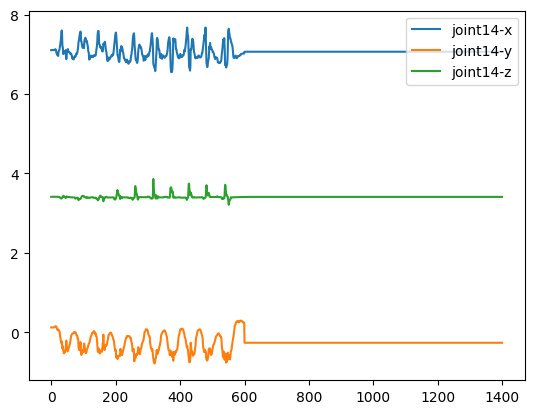

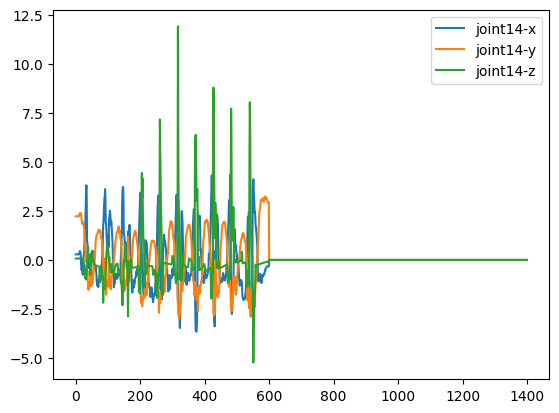

In [216]:
# Standardize all data (?)

scaler = preprocessing.StandardScaler()

initial_data = complete_padded_data[0, 0, 0, ...] # correct movement n.0 by subject n.0
plot_joint_movement(initial_data, joint=14)

standard_data = initial_data.reshape((1400, 22*3))
standard_data = scaler.fit_transform(standard_data)
standard_data = standard_data.reshape((1400, 22, 3))

plot_joint_movement(standard_data, joint=14)


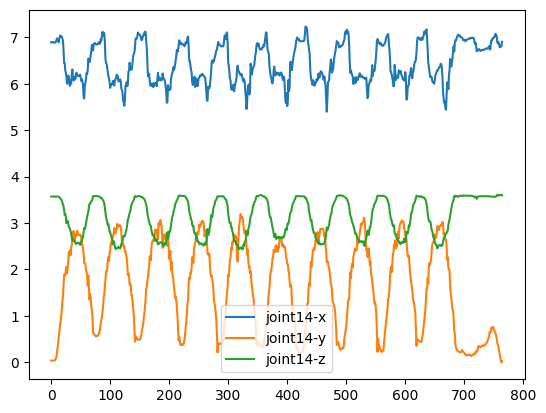

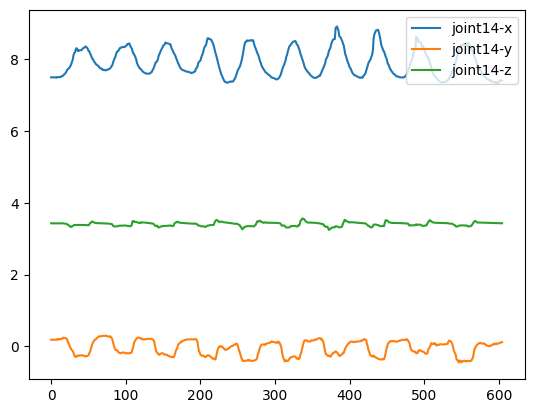

In [177]:
plot_joint_movement(correct_data[1][1], joint=14)
plot_joint_movement(correct_data[2][1], joint=14)

In [160]:
save_data_object(correct_data, 'uiprmd_correct.pkl')
save_data_object(correct_padded_data, 'uiprmd_correct_padded.pkl')
save_data_object(incorrect_data, 'uiprmd_incorrect.pkl')
save_data_object(incorrect_padded_data, 'uiprmd_incorrect_padded.pkl')